In [90]:
%pylab inline
plt.style.use("bmh")
import numpy as np
import pandas as pd
from scipy import stats
np.random.seed(2374)

Populating the interactive namespace from numpy and matplotlib


In [91]:
total_samples = 1600

# New model samples
good_samples_observed = 60
bad_samples_observed = 100

# Original model samples (based on the same set size and success rate)
good_samples_expected = 70
bad_samples_expected = 150


new_model = [good_samples_observed, bad_samples_observed]
old_model = [good_samples_expected, bad_samples_expected]

data = [new_model, old_model]


In [93]:
oddsratio, p_value = stats.fisher_exact(table=data, alternative="greater")

print(f"OddsRatio - {oddsratio}\nP-value - {p_value}")

OddsRatio - 1.2857142857142858
P-value - 0.14846222225811023


# Problem 3 - Question (Model quality)

I built a new model for music recommendation, and it gave 1235 good recommendations out of 1600. 

The previous model is known to give 75% of good recommendations. Can I be sure that my model is an
improvement? 

Provide an analytical p-value and a bootstrapped one to test the null hypothesis of no
improvement vs the alternative of positive improvement.

# Problem 3 - Solution

In [2]:
total_samples = 1600

# New model samples
good_samples_observed = 1235
bad_samples_observed = total_samples - good_samples_observed

# Original model samples (based on the same set size and success rate)
good_samples_expected = 0.75 * total_samples
bad_samples_expected = total_samples - good_samples_expected


new_model = [good_samples_observed, bad_samples_observed]
old_model = [good_samples_expected, bad_samples_expected]

data = [new_model, old_model]


### Analytical p-value based hypothesis testing

We perform a Fisher exact test on a 2x2 contingency table and evaluate the p-value using one sided tail (since we are looking for no improvement vs. positive improvement).

In [3]:
oddsratio, p_value = stats.fisher_exact(table=data, alternative="greater")

print(f"OddsRatio - {oddsratio}\nP-value - {p_value}")

OddsRatio - 1.1278538812785388
P-value - 0.07937417795861512


Based on the p-value (0.0793) we got, if we want to test the hypothesis with 5% significance level, we cannot reject our null hypothesis.

### Bootstrapped p-value based hypothesis testing

We will use a binomial distribution where the success probability = 75% (same as the original model).

We will bootstrap 1000 sets of 1600 samples each based on this distribution.

New model success rate - 0.771875
Boostrapped sets mean success rate - 0.7495112500000001
P-value = 0.031
Bootstrapped sample sets success rate histogram -


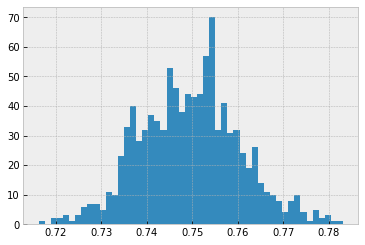

In [39]:
# 1000 sets of the same size as the new model samples set
bootstrapped_model_successes = np.random.binomial(n=total_samples, p=0.75,size=1000)

# Evaluate success rates, p value
btsrp_success_rates = bootstrapped_model_successes / total_samples
p_value = np.sum(np.where(btsrp_success_rates >= (good_samples_observed / total_samples), 1, 0) / np.size(btsrp_success_rates))

print(f"New model success rate - {good_samples_observed / total_samples}")
print(f"Boostrapped sets mean success rate - {np.mean(btsrp_success_rates)}")
print(f"P-value = {p_value}")
print(f"Bootstrapped sample sets success rate histogram -")
plt.hist(btsrp_success_rates, bins=50);


Based on the p-value (0.031) we got, if we want to test the hypothesis with 5% significance level, we can reject our null hypothesis!

# Problem 4 - Question (Comparing salaries)

The [data](https://gist.github.com/avidale/11fcdcb0ed24f842a75dd3c261cdb202) are salaries corresponding to two kinds of occupations: (1) creative, media, and marketing and (2)
education. 

Suppose that the datasets are modeled as realizations of normal distributions. 

Test the null hypothesis that the salary for both occupations is the same at 5% significance level. 

Don’t assume equal variance in two groups.

# Problem 4 - Solution

### Loading the data

In [9]:
!wget https://gist.githubusercontent.com/avidale/11fcdcb0ed24f842a75dd3c261cdb202/raw/7220a1c692e448428432c491b245a6d97abd97ea/salaries1.txt
!wget https://gist.githubusercontent.com/avidale/11fcdcb0ed24f842a75dd3c261cdb202/raw/7220a1c692e448428432c491b245a6d97abd97ea/salaries2.txt

--2021-11-22 11:13:10--  https://gist.githubusercontent.com/avidale/11fcdcb0ed24f842a75dd3c261cdb202/raw/7220a1c692e448428432c491b245a6d97abd97ea/salaries1.txt
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 430 [text/plain]
Saving to: ‘salaries1.txt.2’

salaries1.txt.2     100%[===================>]     430  --.-KB/s    in 0s      

2021-11-22 11:13:10 (8.91 MB/s) - ‘salaries1.txt.2’ saved [430/430]

--2021-11-22 11:13:11--  https://gist.githubusercontent.com/avidale/11fcdcb0ed24f842a75dd3c261cdb202/raw/7220a1c692e448428432c491b245a6d97abd97ea/salaries2.txt
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.1

In [10]:
df1 = pd.read_csv('./salaries1.txt', header=0, names=['salary'])
df2 = pd.read_csv('./salaries2.txt', header=0, names=['salary'])

### Testing the null hypothesis with welch t-test

We will use Welch's t-test, as it is designed for unequal population variances (and we do not know if the variance is different), but the assumption of normality is maintained.

In [11]:
ttest_results = stats.ttest_ind(
                        df1.salary.tolist(), 
                        df2.salary.tolist(), 
                        equal_var=False, # This performs the welch t-test
                    )

In [12]:
ttest_results.pvalue

0.04376328733030908

We see that the p-value is 0.0437~, so if the significance level is 5%, we should reject the null hypothesis that the salary for both occupations is the same

# Problem 5 - Question (Counting bombs)

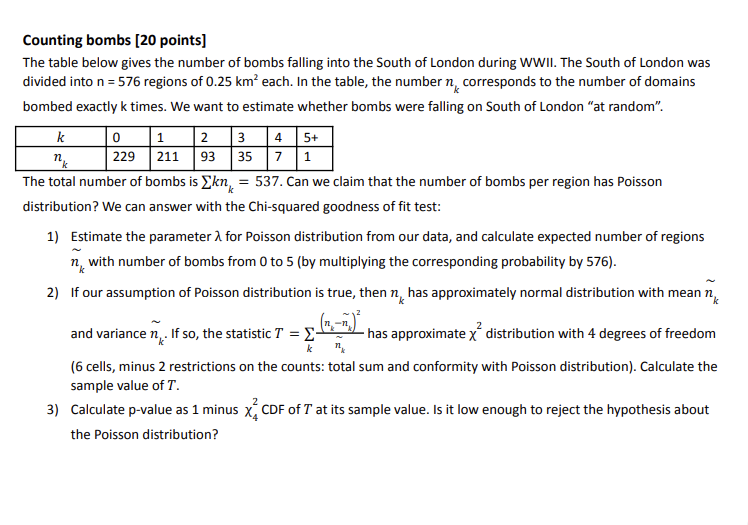

# Problem 5 - Solution

##### 1).

For poisson distribution: $$\lambda = E[X]$$

Therefor, we can say that the estimation for lambda is:
$$\tilde{\lambda} = \frac {0*229 + 1*211 + 2*93 + 3*35 + 4*7 + 7*1}{576}=0.93229167$$

Now looking for the expected number of regions using our estimator we need to evaluate per k:
$$\tilde{n}_{k} = P(\tilde{\lambda}, k) \times{576} = {\displaystyle {\frac {\tilde{\lambda} ^{k}e^{-\tilde{\lambda} }}{k!}}}\times{576}$$

We will use scipy to evaluate these instead of doing it by hand:

In [64]:
mu = 0.93229167
n0 = stats.poisson.pmf(0, mu) * 576
n1 = stats.poisson.pmf(1, mu) * 576
n2 = stats.poisson.pmf(2, mu) * 576
n3 = stats.poisson.pmf(3, mu) * 576
n4 = stats.poisson.pmf(4, mu) * 576
n5 = (1 - stats.poisson.cdf(4, mu)) * 576

print("1-4 values:")
print(n0, n1, n2, n3, n4)
print("5+ value:")
print(n5)

1-4 values:
226.7427218274304 211.39035079284054 98.53873158127156 30.62227954186181 7.137224033322294
5+ value:
1.5686922232733664


Therfor, the results are:

1-4 Values:
$$\tilde{n}_{0} = P(0.93229167, 0) \times{576} = 226.74$$
$$\tilde{n}_{1} = P(0.93229167, 0) \times{576} = 211.39$$
$$\tilde{n}_{2} = P(0.93229167, 0) \times{576} = 98.53$$
$$\tilde{n}_{3} = P(0.93229167, 0) \times{576} = 30.62$$
$$\tilde{n}_{4} = P(0.93229167, 0) \times{576} = 7.13$$

For 5+:
$$\tilde{n}_{5} = (1-CDF(4)) \times{576} = 1.56$$

##### 2). Sample value of t

In [68]:
T = np.square(n0-229)/n0 + \
    np.square(n1-211)/n1 + \
    np.square(n2-93)/n2 + \
    np.square(n3-35)/n3 + \
    np.square(n4-7)/n4 + \
    np.square(n5-1)/n5
T

1.169154679342567

The sample value of T is:

T = 1.169154679342567

##### 3). the p-value calculation

In [89]:
degrees_of_freedom = 4
pvalue = 1 - stats.chi2.cdf(T, degrees_of_freedom)
pvalue

0.8831505182412922

As we see, the p-value is very high here and is not low enough to reject the null hypothesis of course